<a href="https://colab.research.google.com/github/shivanshus/Emotion-DeepDream-Machine/blob/master/EDM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asset 1

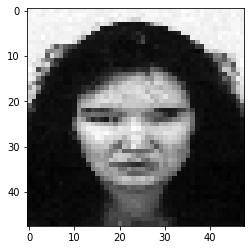

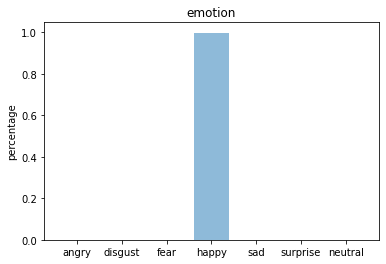

In [ ]:
#import libraries and modules

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
num_classes = 7
batch_size = 256
epochs = 200

In [ ]:
import io
data = pd.read_csv('/content/drive/My Drive/fer2013_edm.csv')

In [ ]:
#data importing

data = open('/content/drive/My Drive/fer2013_edm.csv')
data_info = pd.read_csv('/content/drive/My Drive/fer2013_edm.csv')
print('Number of rows = {} and the Columns are {}'.format(data_info.shape[0], data_info.columns))

Number of rows = 35887 and the Columns are Index(['emotion', 'pixels', 'Usage'], dtype='object')


In [ ]:
#Data Pre-processing

x_train, y_train, x_test, y_test = [],[],[],[]

with open("/content/drive/My Drive/fer2013_edm.csv") as f:
    content = f.readlines()
    
lines = np.array(content)
num_instances = lines.size

for i in range(1, num_instances):
    try:
        emotion, pixel, Usage = lines[i].split(",")
        value = pixel.split(" ")
        pixels = np.array(value, 'float32')
        emotion = to_categorical(emotion,7)
        
        if 'Training' in Usage:
            x_train.append(pixels)
            y_train.append(emotion)
        elif 'PublicTest' in Usage:
            x_test.append(pixels)
            y_test.append(emotion)
    except:
        print("", end="")



In [ ]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(x_train.shape[0],48,48,1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0],48,48,1)
x_test = x_test.astype('float32')

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.utils import to_categorical
def edm_model():
   
    model = Sequential()
    inputs = Input(shape=(48,48,1))
    layer_1 = Conv2D(128, (3,3), activation='relu',name='c1')(inputs)
    layer_2 = MaxPooling2D(pool_size=(5,5), strides=(2,2), name='mp1')(layer_1)
    layer_3 = Conv2D(64, (5,5), activation='relu', name='c2')(layer_2)
    layer_4 = MaxPooling2D(pool_size=(3,3), strides=(2,2), name='mp2')(layer_3)
    layer_5 = Conv2D(64, (3,3), activation='relu', name='c3')(layer_4)
    layer_6 = AveragePooling2D(pool_size=(3,3), strides=(2,2), name='ap1')(layer_5)
    layer_7 = Flatten(name='f1')(layer_6)
    layer_8 = Dense(1024, activation='relu', name='d1')(layer_7)
    layer_9 = Dropout(0.2, name='do1')(layer_8)
    layer_10 = Dense(512, activation='relu', name='d2')(layer_9)
    layer_11 = Dropout(0.2, name='do2')(layer_10)
    layer_12 = Dense(num_classes, activation='softmax', name='d3')(layer_11)
    
    model = Model(inputs=inputs, outputs=layer_12)
    
    model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
model = edm_model()
model.save('edm_model.h5')

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 2)

Epoch 1/200
113/113 - 11s - loss: 1.8093 - accuracy: 0.2504
Epoch 2/200
113/113 - 4s - loss: 1.6278 - accuracy: 0.3539
Epoch 3/200
113/113 - 4s - loss: 1.4740 - accuracy: 0.4305
Epoch 4/200
113/113 - 4s - loss: 1.3890 - accuracy: 0.4607
Epoch 5/200
113/113 - 4s - loss: 1.3290 - accuracy: 0.4897
Epoch 6/200
113/113 - 4s - loss: 1.2813 - accuracy: 0.5080
Epoch 7/200
113/113 - 4s - loss: 1.2402 - accuracy: 0.5244
Epoch 8/200
113/113 - 4s - loss: 1.2140 - accuracy: 0.5358
Epoch 9/200
113/113 - 4s - loss: 1.1812 - accuracy: 0.5531
Epoch 10/200
113/113 - 4s - loss: 1.1591 - accuracy: 0.5610
Epoch 11/200
113/113 - 4s - loss: 1.1311 - accuracy: 0.5725
Epoch 12/200
113/113 - 4s - loss: 1.1158 - accuracy: 0.5795
Epoch 13/200
113/113 - 4s - loss: 1.0922 - accuracy: 0.5881
Epoch 14/200
113/113 - 4s - loss: 1.0722 - accuracy: 0.5980
Epoch 15/200
113/113 - 4s - loss: 1.0512 - accuracy: 0.6031
Epoch 16/200
113/113 - 4s - loss: 1.0323 - accuracy: 0.6119
Epoch 17/200
113/113 - 4s - loss: 1.0154 - accur

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [ ]:
pred_y = model.predict(x_test)

In [ ]:
print("accuracy = ", accuracy_score(np.argmax(y_test,axis=1), np.argmax(pred_y, axis=1)))
print("F-score = ", f1_score(np.argmax(y_test,axis=1), np.argmax(pred_y,axis=1), average='weighted'))
print("Precision = ", precision_score(np.argmax(y_test,axis=1), np.argmax(pred_y,axis=1), average='weighted'))
print("Recall = ", recall_score(np.argmax(y_test,axis=1), np.argmax(pred_y,axis=1), average='weighted'))

accuracy =  0.5828921705210365
F-score =  0.5830745988022766
Precision =  0.58497243394437
Recall =  0.5828921705210365


In [ ]:
print(confusion_matrix(np.argmax(pred_y,axis=1), np.argmax(y_test, axis=1)))

[[230  12  53  40  72  14  54]
 [  2  27   1   1   2   2   0]
 [ 62   4 215  45  97  49  72]
 [ 45   2  33 700  62  13  75]
 [ 71   6  96  38 300  15  89]
 [ 12   1  42  17   8 309   6]
 [ 45   4  56  54 112  13 311]]


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving ang.JPG to ang.JPG


In [ ]:
import io
url = '/content/ang.JPG'

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


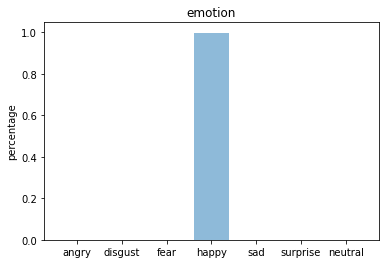

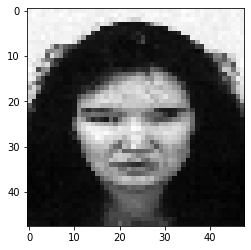

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img(url, grayscale=True, target_size=(48, 48))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model.predict(x)
emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

In [ ]:
layer_name=[]

for layer in model.layers:
    print(layer.name)
    layer_name.append(layer.name)

input_1
c1
mp1
c2
mp2
c3
ap1
f1
d1
do1
d2
do2
d3


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from IPython.display import clear_output

In [ ]:
url = 'https://scontent.fpat3-1.fna.fbcdn.net/v/t1.0-9/59847270_1182566328582309_5644130074018971648_n.jpg?_nc_cat=100&_nc_ohc=3TivxLXuWBsAQmo-lPGZ8PnPnviM7Z6Ot5lAgScHyRVWbtnSzgqAD5i7w&_nc_ht=scontent.fpat3-1.fna&oh=b32e52457976604b6bbf5c9fe788e298&oe=5E88B13C'

In [ ]:
def download(url, target_size=None):
    name = url.split('/')[-1]
    image_path = tf.keras.utils.get_file(name, origin=url)
    print(image_path)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    return img
    return image_path

def deprocess(img):
    img = 255*(img+1.0)/2.0
    return tf.cast(img, tf.uint8)

def show(img):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [ ]:
org_image = download(url, target_size=[225,375])
org_image = np.array(org_image)
show(org_image)

In [ ]:
#base_model = tf.keras.models.load_model('edm_model')
#base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')\
from tensorflow.keras.models import load_model
base_model = load_model('edm_model.h5')

In [ ]:
layer_name=[]

for layer in base_model.layers:
    print(layer.name)
    layer_name.append(layer.name)

input_1
c1
mp1
c2
mp2
c3
ap1
f1
d1
do1
d2
do2
d3


In [ ]:
#names = ['dense_1', 'dense_2']
#layers = [base_model.get_layer(name).output for name in names]

# Create the feature extraction model
#dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

names = ['c2', 'c3']
layers = [base_model.get_layer(name).output for name in names]
print(layers)

from tensorflow.keras.models import Model
# Create the feature extraction model
dream_model = Model(inputs=base_model.input, outputs=layers)

[<tf.Tensor 'c2_1/Identity:0' shape=(?, 18, 18, 64) dtype=float32>, <tf.Tensor 'c3_1/Identity:0' shape=(?, 6, 6, 128) dtype=float32>]


In [ ]:
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)

    losses = []
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return  tf.reduce_sum(losses)



In [ ]:
@tf.function
def deepdream(model, img, step_size):
    with tf.GradientTape() as tape:
      # This needs gradients relative to `img`
      # `GradientTape` only watches `tf.Variable`s by default
        tape.watch(img)
        loss = calc_loss(img, model)

    # Calculate the gradient of the loss with respect to the pixels of the input image.
    gradients = tape.gradient(loss, img)

    # Normalize the gradients.
    gradients /= tf.math.reduce_std(gradients) + 1e-8 
    
    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)
    img = img + gradients*step_size
    img = tf.clip_by_value(img, -1, 1)

    return loss, img

In [ ]:
def get_tiled_gradients(model, img, tile_size=512):
    shift_down, shift_right, img_rolled = random_roll(img, tile_size)
    gradients = tf.zeros_like(img_rolled)
    
    for x in tf.range(0 ,img_rolled.shape[0], tile_size):
        for y in tf.range(0, img_rolled.shape[1], tile_size):
            
            with tf.GradientTape() as tape:
                tape.watch(img_rolled)
                img_tile = img_rolled[x:x+tile_size, y:y+tile_size]
                loss = calc_loss(img_tile, model)
                
            gradients = gradients + tape.gradient(loss, img_rolled)
            
    gradients = tf.roll(tf.roll(gradients, -shift_right, axis=1), -shift_down, axis=0)
    
    gradients /= tf.math.reduce_std(gradients) + 1e-8 
    
    return gradients

In [ ]:
def run_deep_dream_with_octaves(model, img, steps_per_octave=50, step_size=0.01, num_octaves=1, octave_scale=1.3):
    img=tf.keras.preprocessing.image.img_to_array(img)
    
    

    for octave in range(num_octaves):
         if octave > 0:
            new_size = tf.cast(tf.convert_to_tensor(img.shape[:2]), tf.float32)*octave_scale
            img = tf.image.resize(img, tf.cast(new_size, tf.int32))
    
         for step in range(steps_per_octave):
            gradients = get_tiled_gradients(model, img)
            img = img + gradients*step_size
            img = tf.clip_by_value(img, -1, 1)
        
            if step % 10 == 0:
                clear_output(wait=True)
                show(deprocess(img))
                print ("Octave {}, Step {}".format(octave, step))
            
    clear_output(wait=True)
    result = deprocess(img)
    show(result)

    return result


In [ ]:
def random_roll(img, maxroll):
  # Randomly shift the image to avoid tiled boundaries.
    shift = tf.random.uniform(shape=[2], minval=-maxroll, maxval=maxroll, dtype=tf.int32)
    shift_down, shift_right = shift[0],shift[1] 
    img_rolled = tf.roll(tf.roll(img, shift_right, axis=1), shift_down, axis=0)
    return shift_down, shift_right, img_rolled

In [ ]:
dream_img = run_deep_dream_with_octaves(model=dream_model, img=org_image, step_size=0.01)
clear_output()
show(org_image)
show(dream_img)